In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string

In [9]:
df = pd.read_csv('/content/reviews_genshin_impact_annotation.csv')
df = df[['review_text', 'sentiment']]
df.dropna(inplace=True)

In [12]:
print("Total number of samples:", len(df))
print("\nSample rows:")
df.sample(5)

Total number of samples: 100

Sample rows:


,review_text,sentiment
84,"gacanya min, jangan kikir-kikir naikin win rat...",Negative
99,game gila,Negative
64,MANA INI TOMBOL SKIP NYA DI KIRA SEMUA ORANG S...,Negative
55,"seru, cuman akun lama hilang tiba-tiba, jadi i...",Positive
89,game bagus minus tombol skip story 🗿,Positive


In [13]:
print("\nSentiment distribution:")
df['sentiment'].value_counts()


Sentiment distribution:


,count
sentiment,
Negative,38
Positive,32
Neutral,30


/tmp/ipython-input-14-707345689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


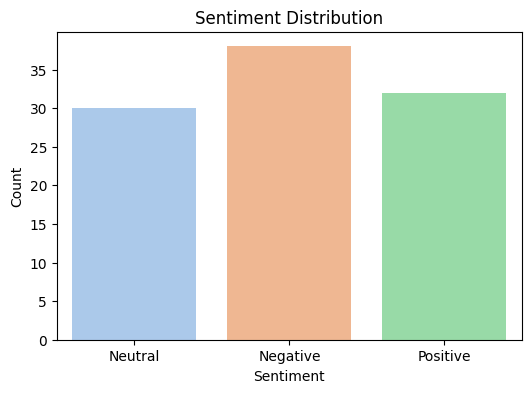

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

/tmp/ipython-input-15-4287020649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='text_length', palette='Set2')


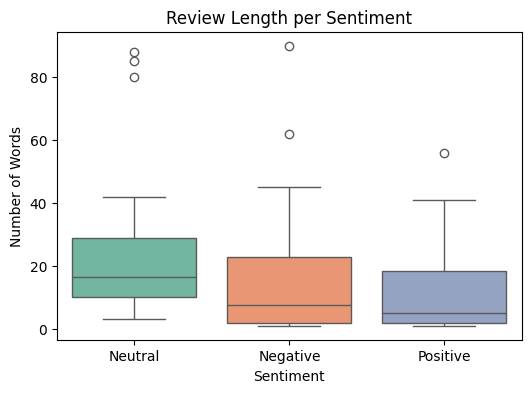

In [15]:
df['text_length'] = df['review_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='sentiment', y='text_length', palette='Set2')
plt.title('Review Length per Sentiment')
plt.ylabel('Number of Words')
plt.xlabel('Sentiment')
plt.show()

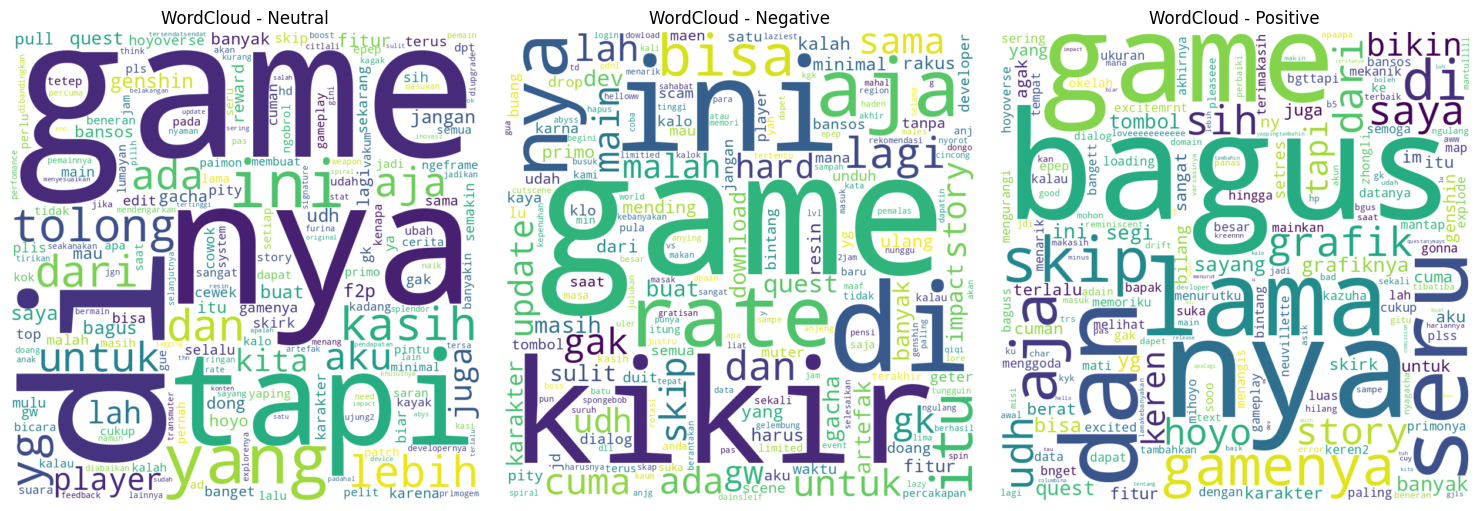

In [18]:
def clean_text(text):
    text = text.lower()
    text = ''.join(ch for ch in text if ch not in string.punctuation)
    return text

plt.figure(figsize=(15, 5))
for i, sentiment in enumerate(df['sentiment'].unique()):
    text = ' '.join(df[df['sentiment'] == sentiment]['review_text'].dropna().astype(str))
    wc = WordCloud(width=800, height=800, background_color='white').generate(clean_text(text))
    plt.subplot(1, 3, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"WordCloud - {sentiment}")
    plt.axis('off')

plt.tight_layout()
plt.show()